In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [157]:
#Caricamento del grafo orientato
df_edge = pd.read_csv('twitch\PTBR\musae_PTBR_edges.csv')
df_target = pd.read_csv('twitch\PTBR\musae_PTBR_target.csv')


In [158]:
edges = list(zip(df_edge["from"],df_edge["to"]))
nodes = df_target["new_id"]


In [159]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [160]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  1912
EDGES:  31299
DENSITY:  0.009
CLUSTERING:  0.15994763733467576


In [67]:
nx.clustering(graph)

{2: 0.14473684210526316,
 287: 0.15442690459849004,
 689: 0.20024198427102238,
 417: 0.15151515151515152,
 656: 0.21169354838709678,
 1423: 0.2222222222222222,
 866: 0.1857707509881423,
 1694: 0.1774891774891775,
 1443: 0.16042780748663102,
 1867: 0.14343434343434344,
 769: 0.1737179487179487,
 127: 0.10712898212898213,
 318: 0.19,
 260: 0.24603174603174602,
 1720: 0.21052631578947367,
 36: 0.11642009862721578,
 207: 0.15169082125603864,
 1287: 0.1264524948735475,
 298: 0.20689655172413793,
 471: 0.13721365123889667,
 1782: 0.19696969696969696,
 4: 0,
 369: 0.17771929824561403,
 5: 0.3261904761904762,
 1621: 0.19036226930963773,
 982: 0.20553359683794467,
 290: 0.11764705882352941,
 467: 0.14096109839816934,
 1245: 0.2558139534883721,
 717: 0.20650449497620307,
 1557: 0.23593466424682397,
 894: 0.21367521367521367,
 1320: 0.1424731182795699,
 1259: 0.16990424076607388,
 1721: 0.14980392156862746,
 1311: 0.14317375886524822,
 1660: 0.14867694650675806,
 1758: 0.1742283950617284,
 1476: 

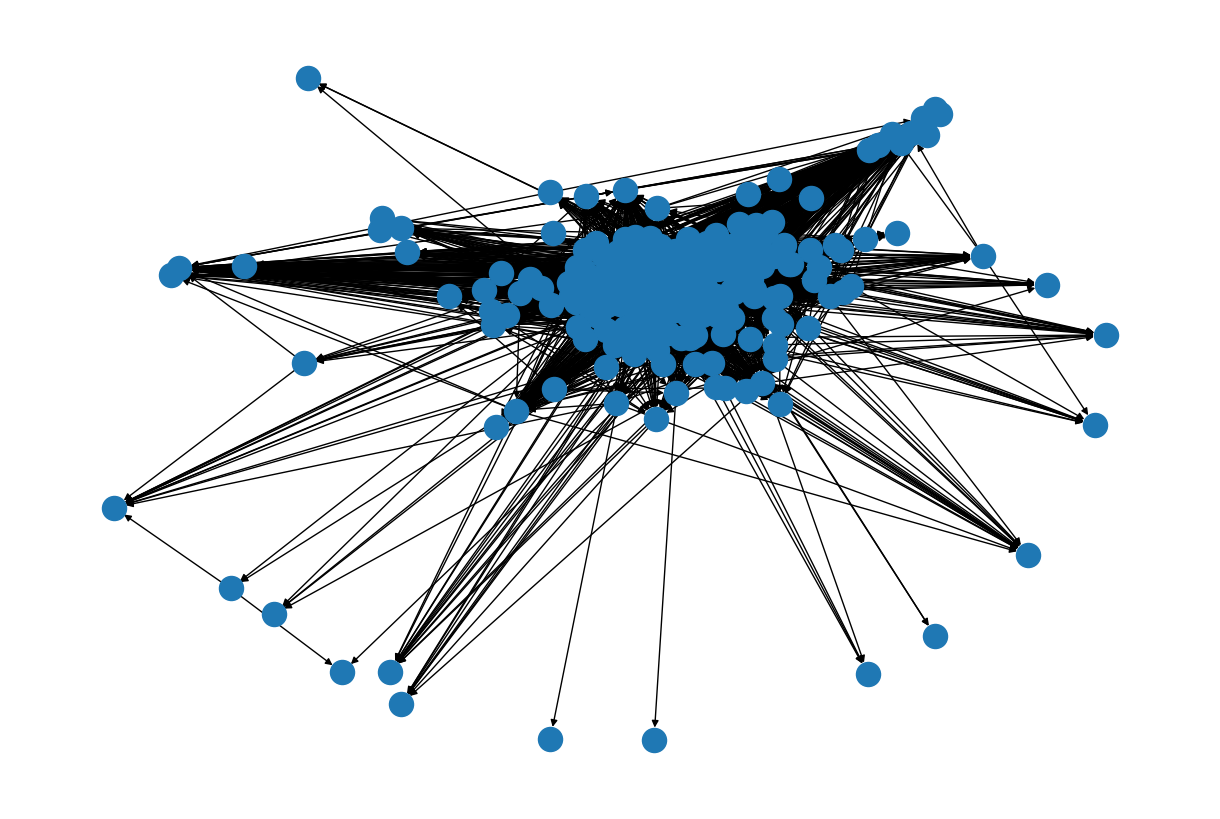

In [68]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<AxesSubplot: >

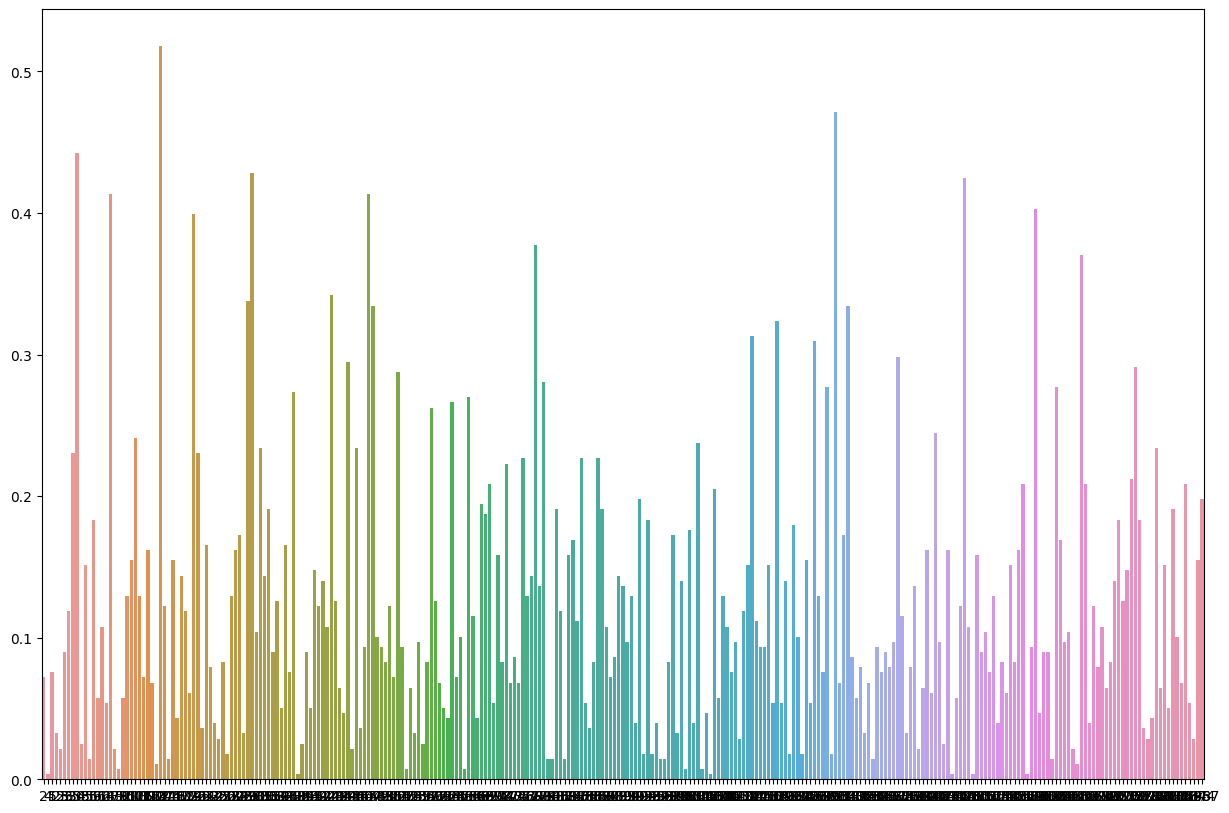

In [70]:
deg = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
#sns.barplot(list(bet.keys()), list(bet.values()))
sns.barplot(x=list(deg.keys()),y=list(deg.values()))

<Figure size 1500x1000 with 0 Axes>

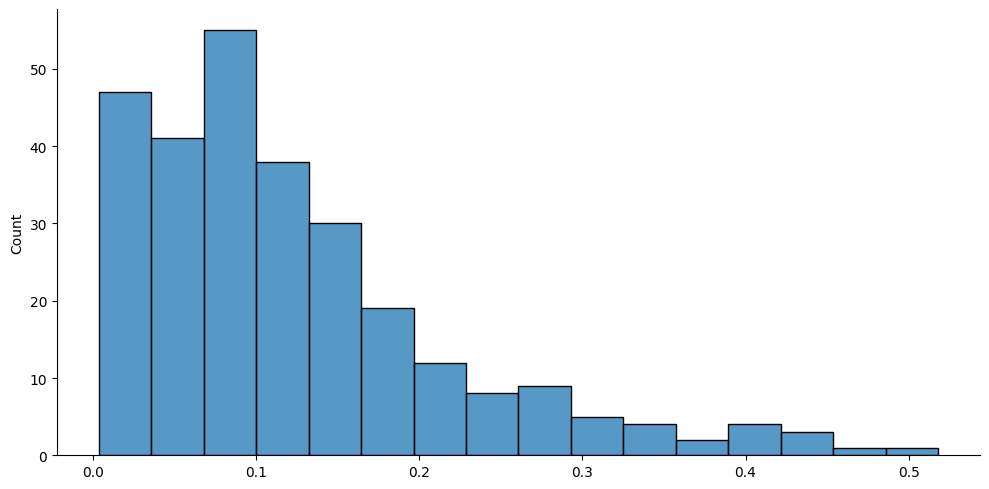

In [134]:
plt.figure(figsize=(15,10))
sns.displot(list(deg.values()),kde=False,aspect=2)

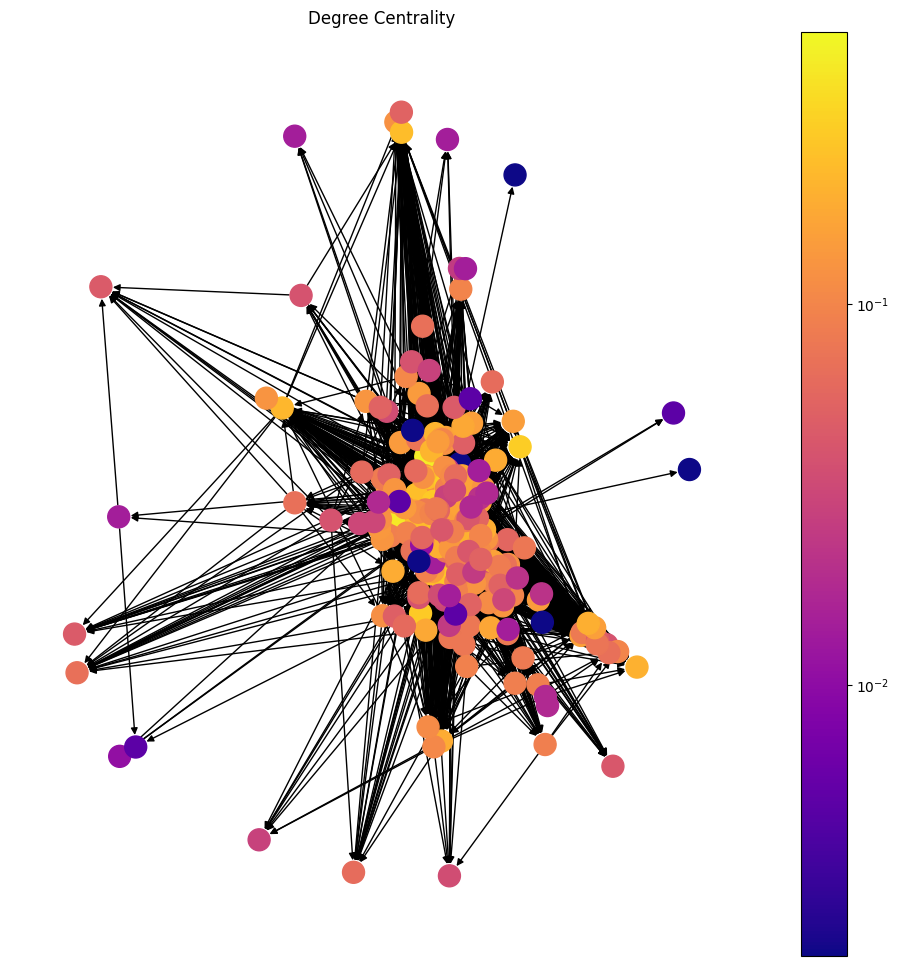

In [72]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, deg, 'Degree Centrality')

{127: Text(0.010836847137983184, 0.006856305307804271, '127'),
 36: Text(0.10138149031976271, -0.037423351501023716, '36'),
 290: Text(-0.06315222148608572, 0.016662003536989486, '290'),
 467: Text(0.05701973407902234, -0.023148792871497608, '467'),
 1476: Text(-0.13231744838915782, 0.04946964430096571, '1476'),
 1297: Text(-0.0577574656450496, -0.04838294257893137, '1297'),
 1593: Text(0.004073397240255097, 0.024831865989891556, '1593'),
 67: Text(0.029061453081151736, -0.01809340802013384, '67')}

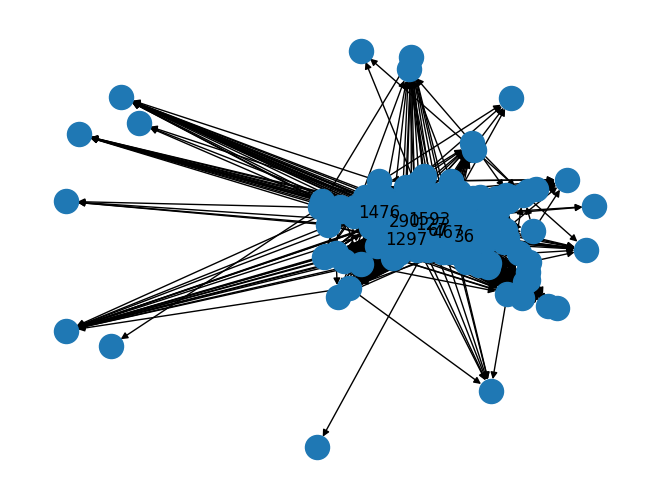

In [76]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in deg.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Betweenness Centrality

<AxesSubplot: >

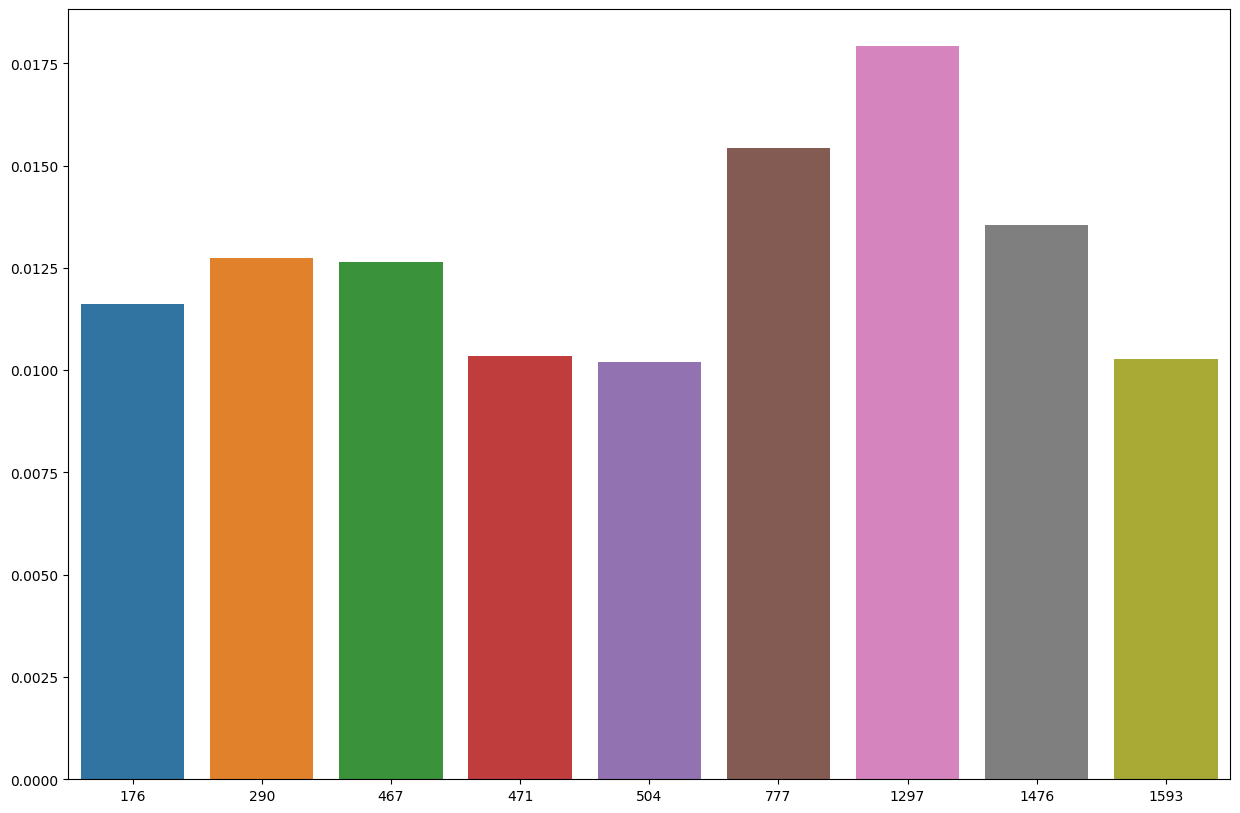

In [77]:
bet = nx.betweenness_centrality(graph)
x=[]
y=[]
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y)

<Figure size 1500x1000 with 0 Axes>

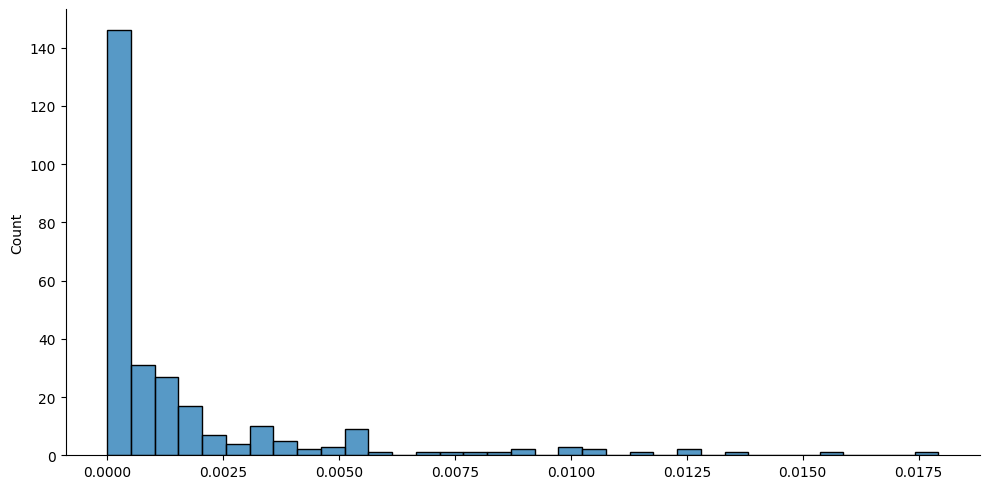

In [133]:
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()),kde=False,aspect=2)
plt.show()

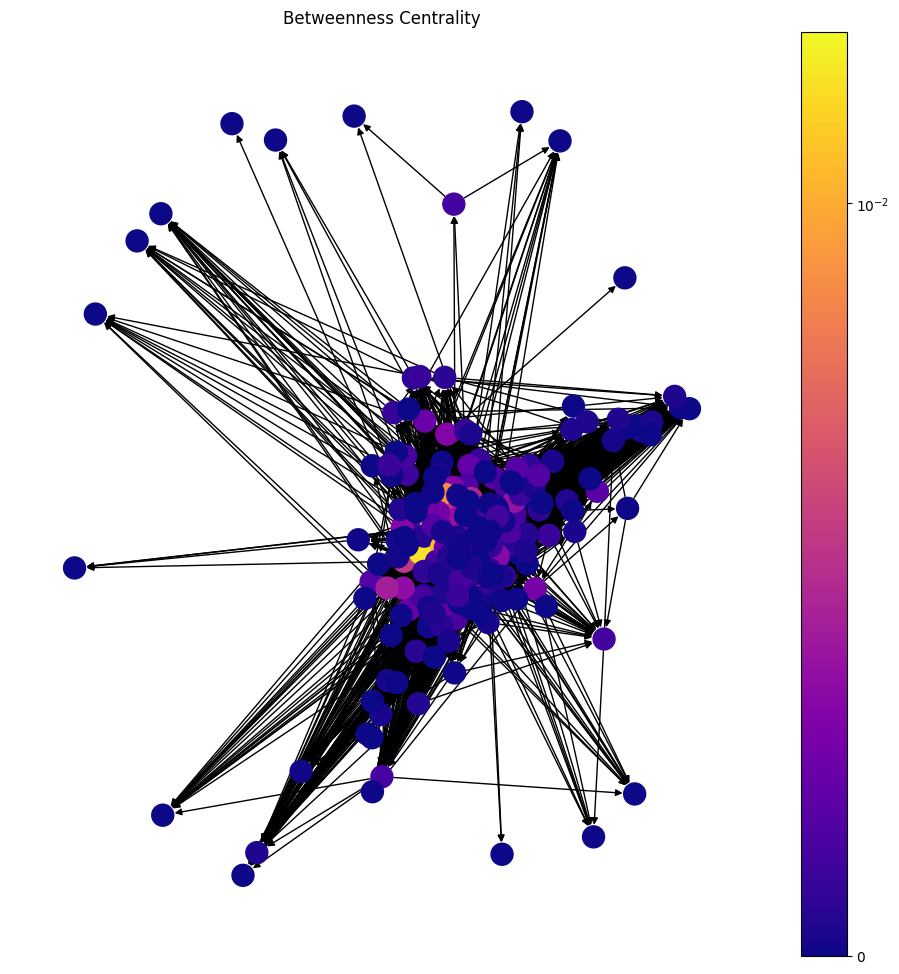

In [79]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

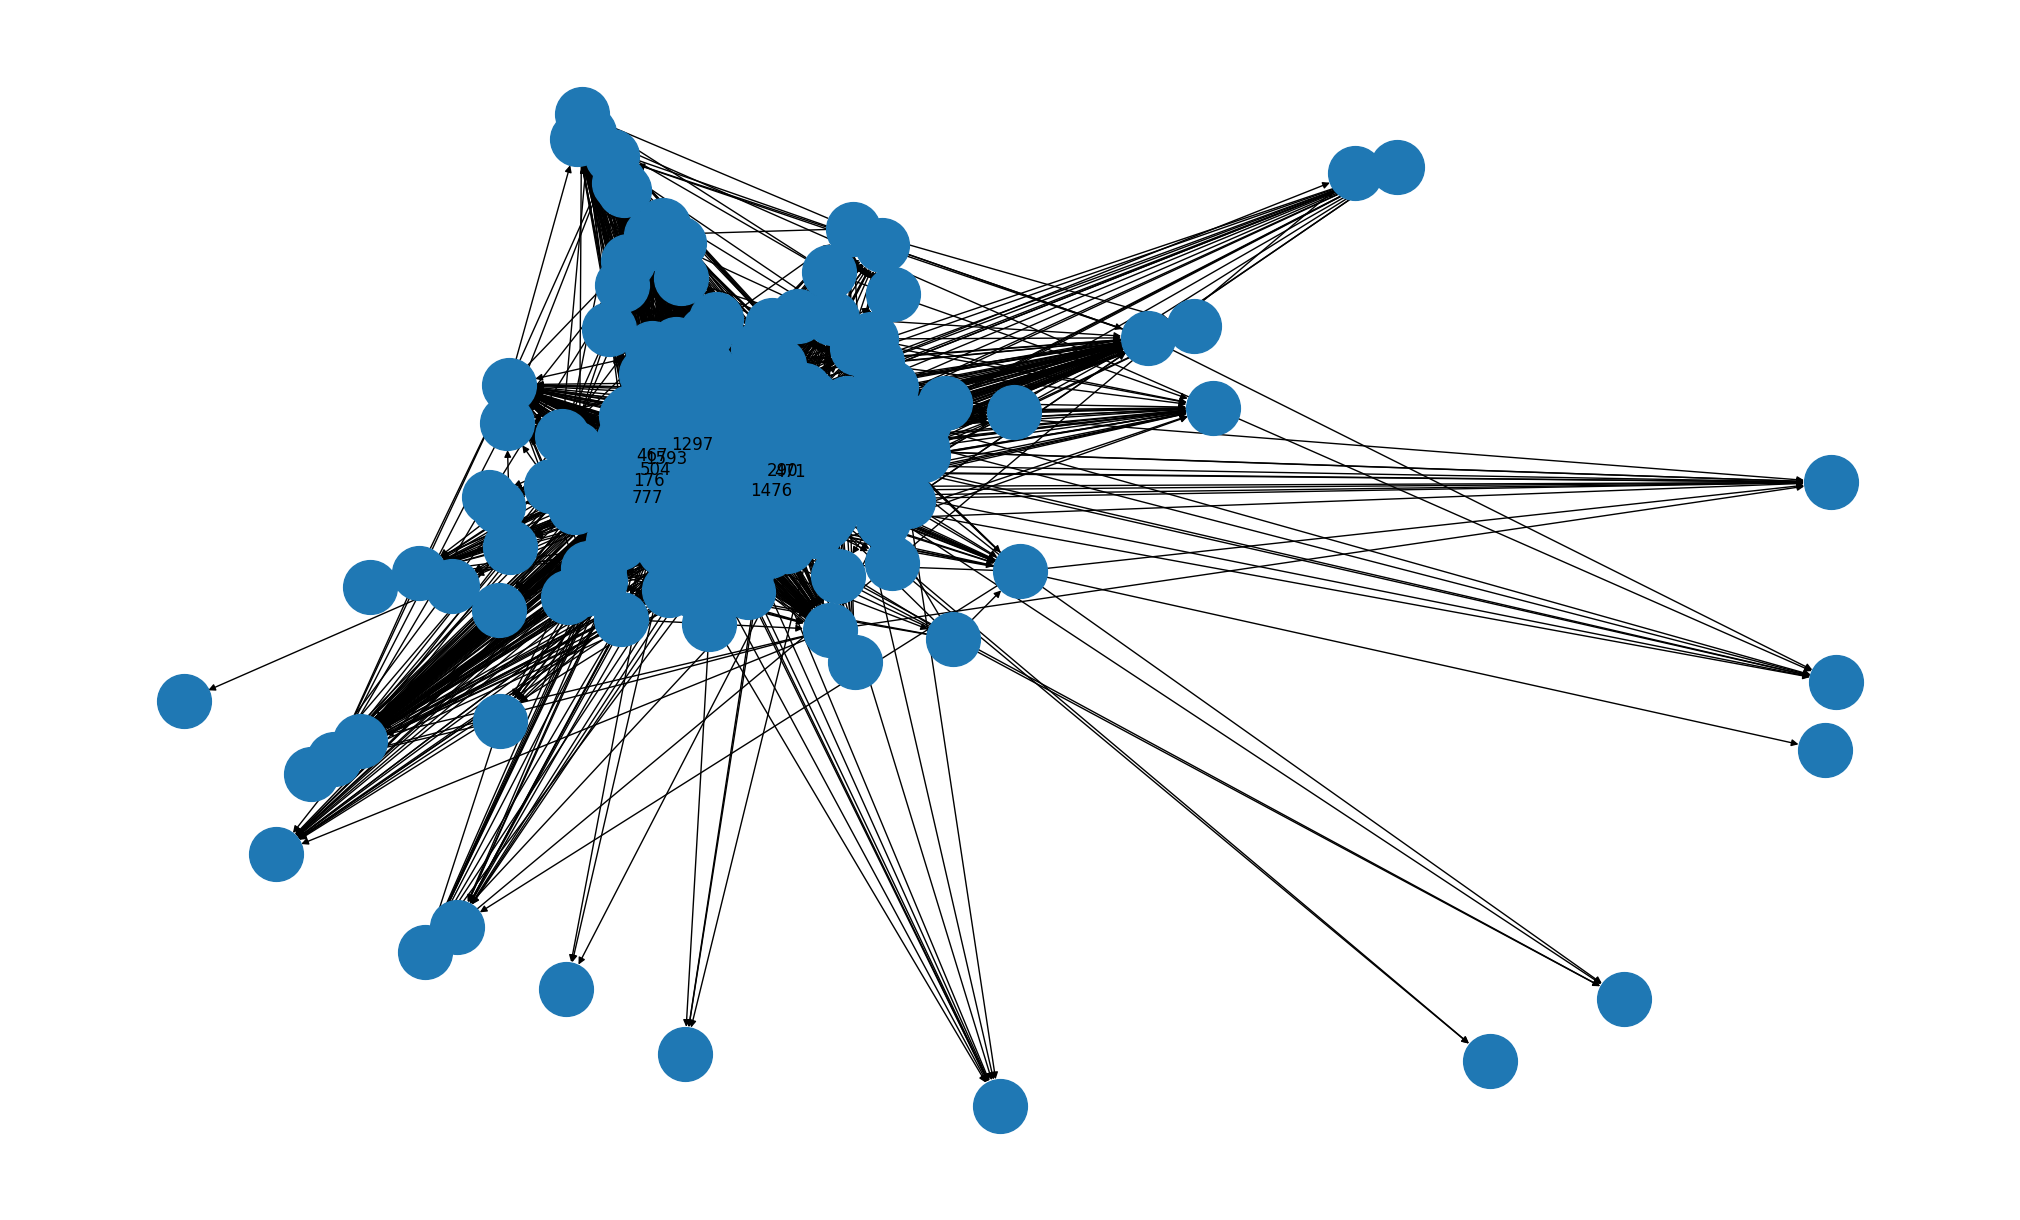

In [151]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
plt.figure(1,figsize=(20,12)) 
nx.draw(graph, pos, with_labels = False,node_size=1500,font_size=10) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)
plt.show()

Closeness Centrality

<AxesSubplot: >

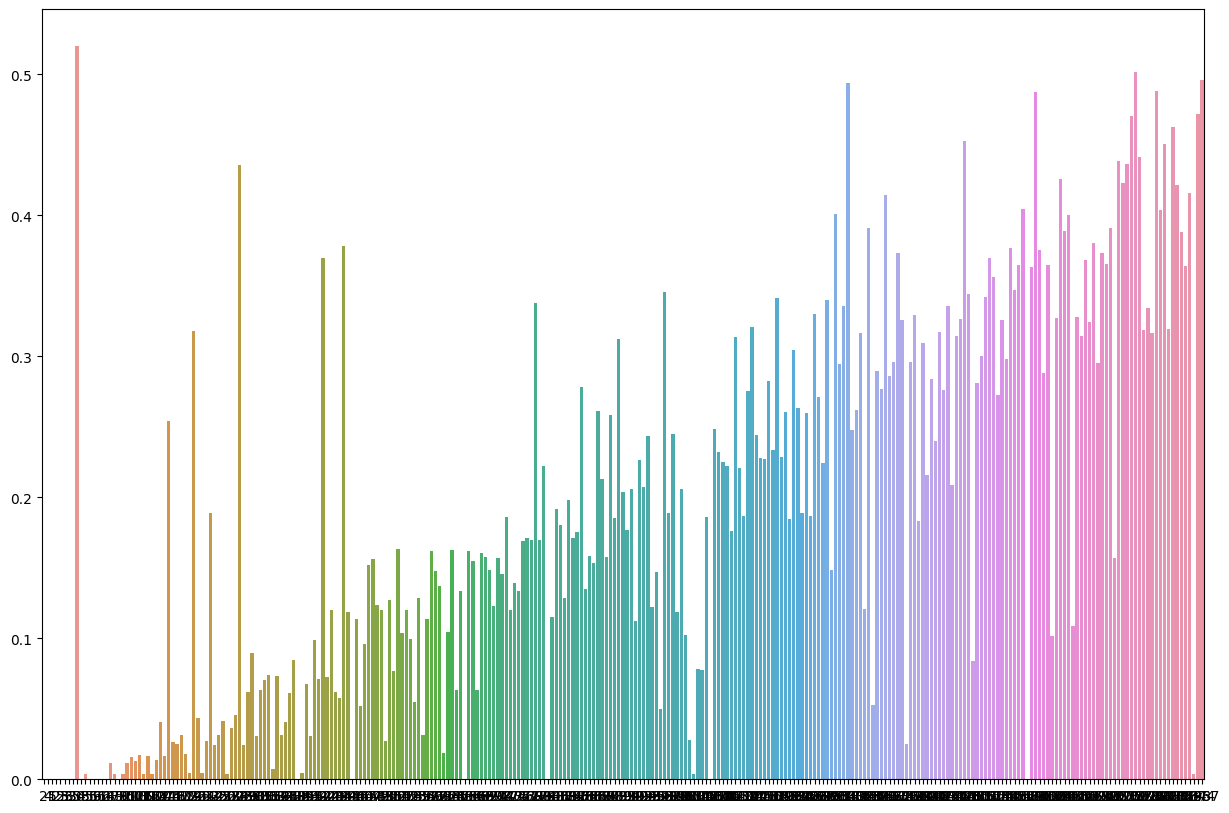

In [85]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(x=list(clos.keys()),y= list(clos.values()))

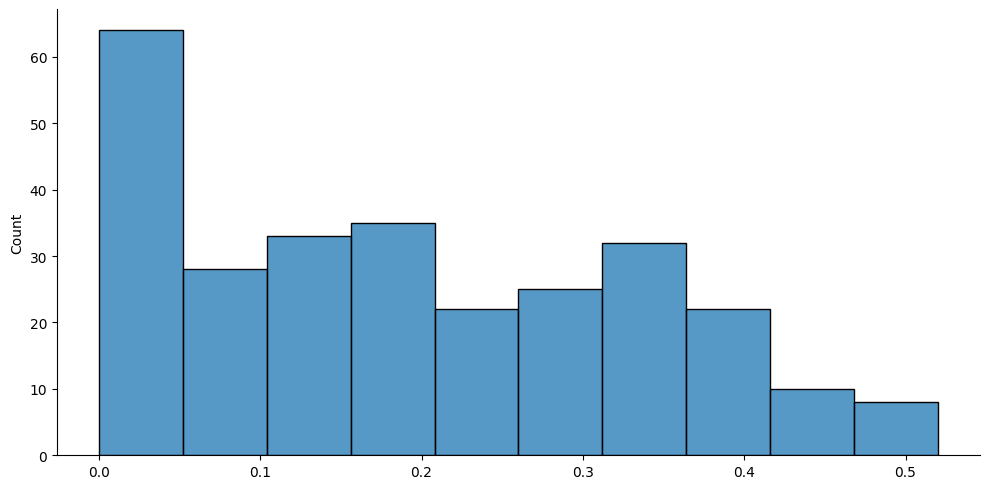

In [137]:
sns.displot(data=list(clos.values()),aspect=2)

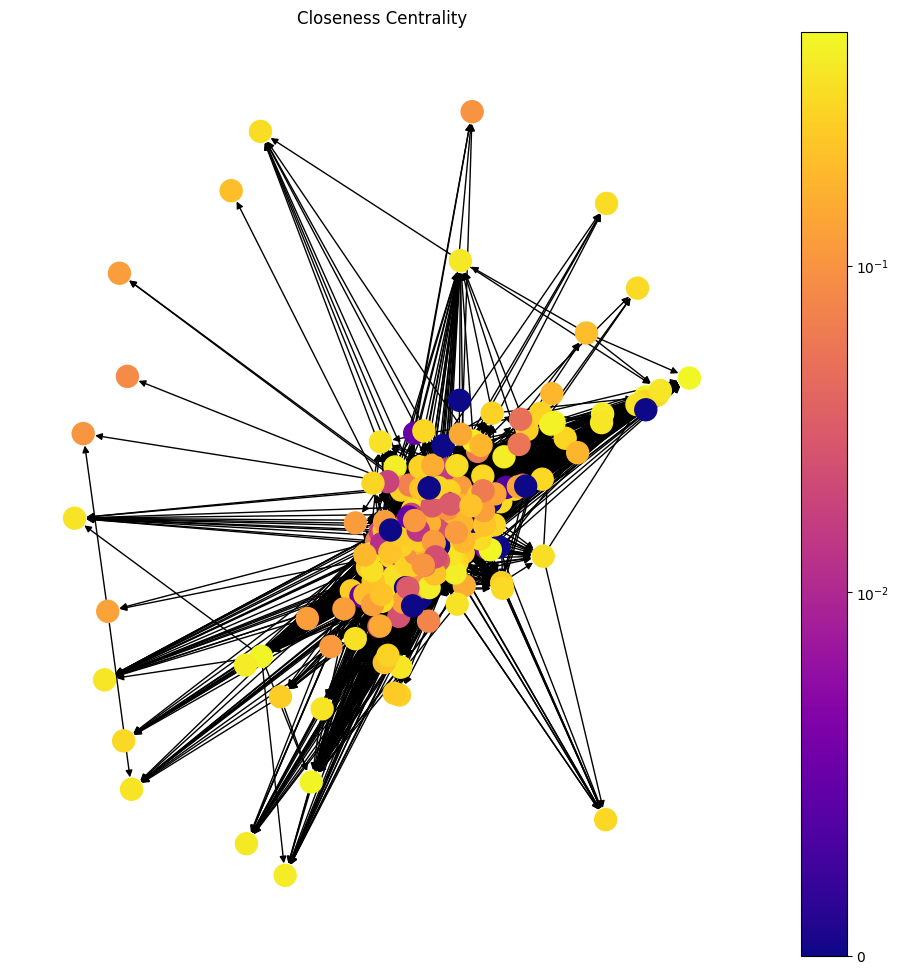

In [88]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

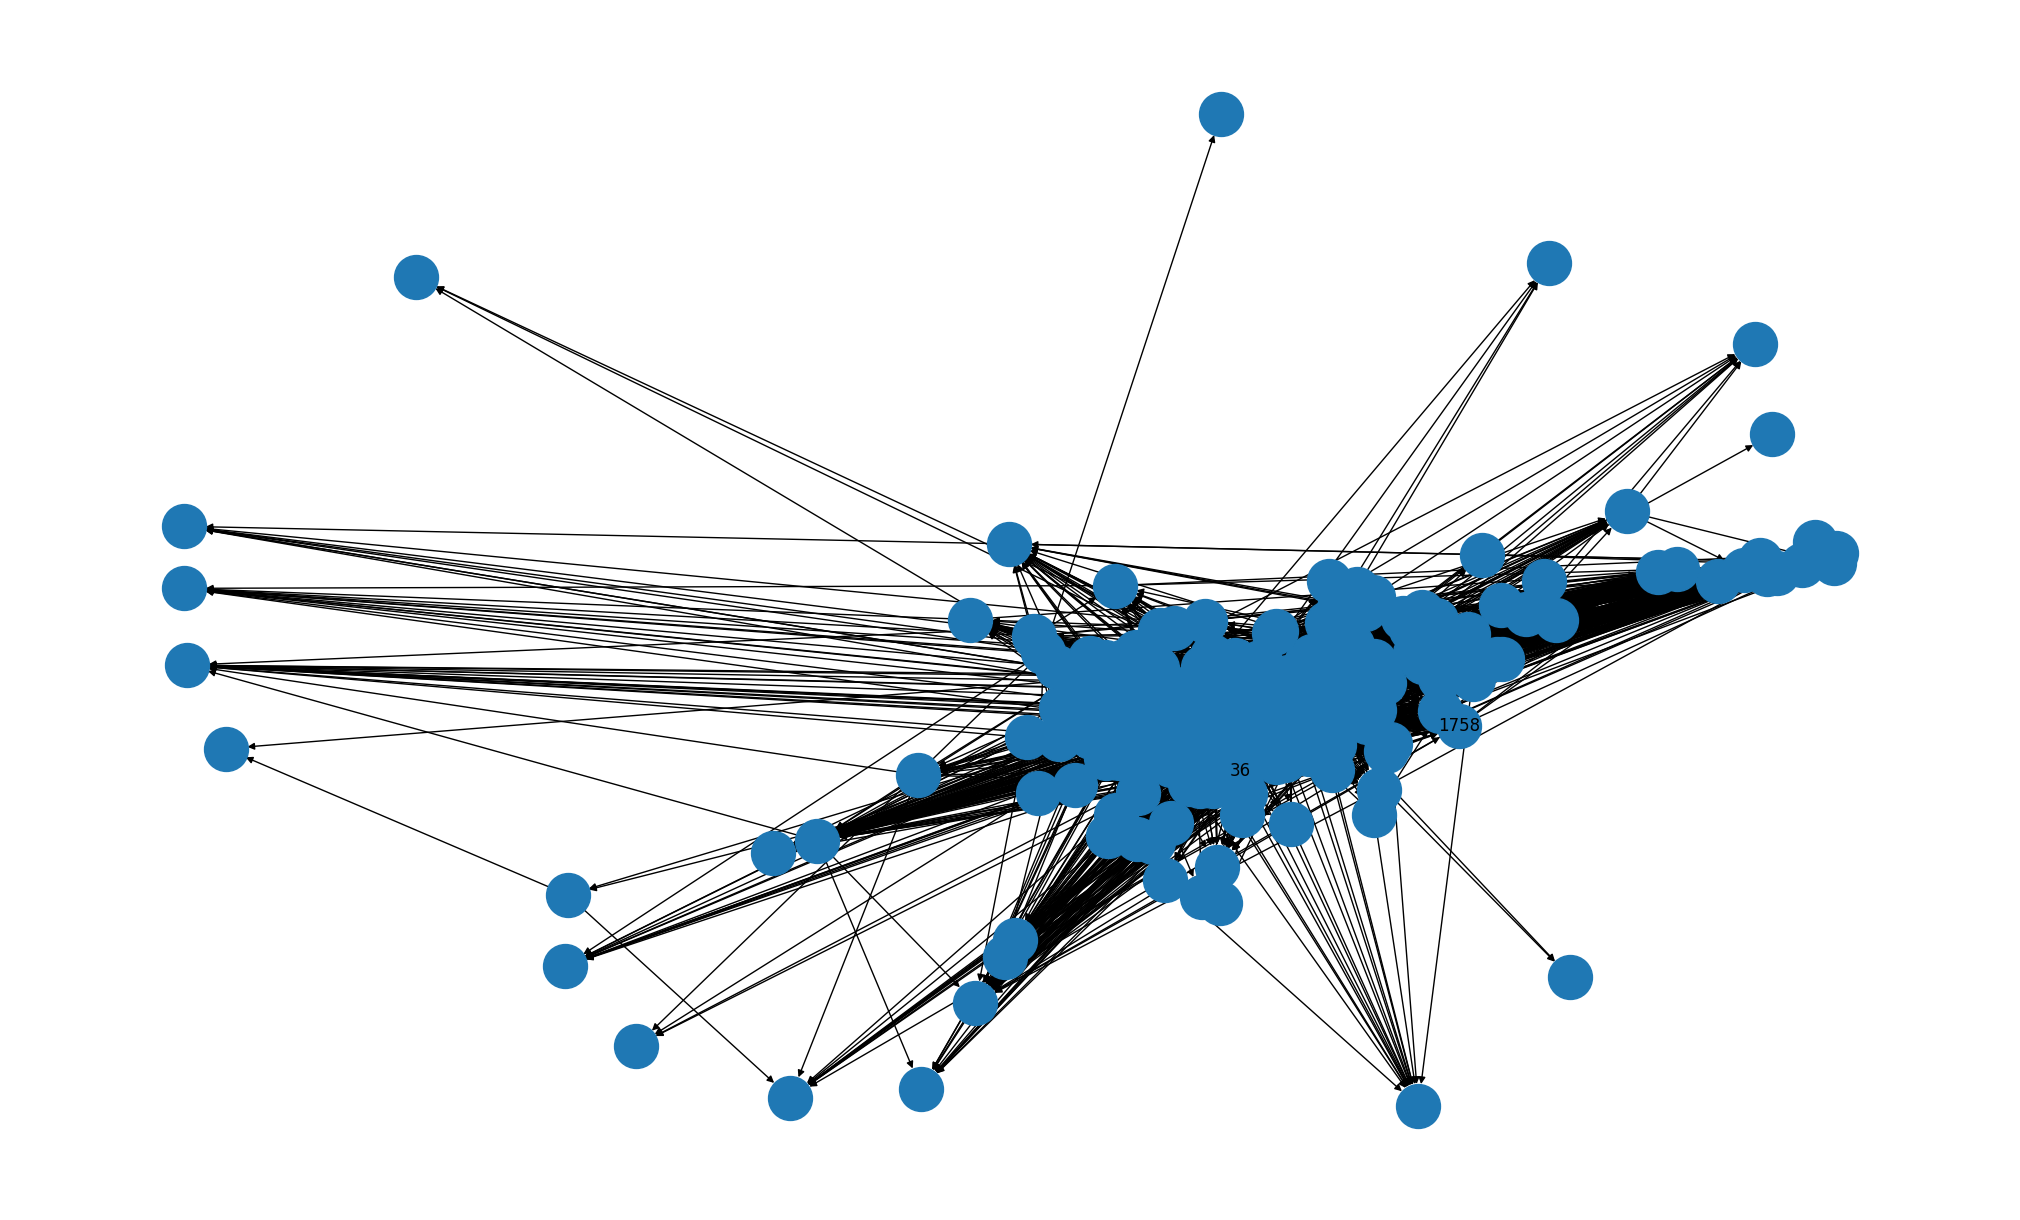

In [147]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.5: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
plt.figure(3,figsize=(20,12)) 
nx.draw(graph, pos, with_labels = False,node_size=1000,font_size=6) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)
plt.show()

Eigenvector Centrality

0.9936536655709698


<AxesSubplot: >

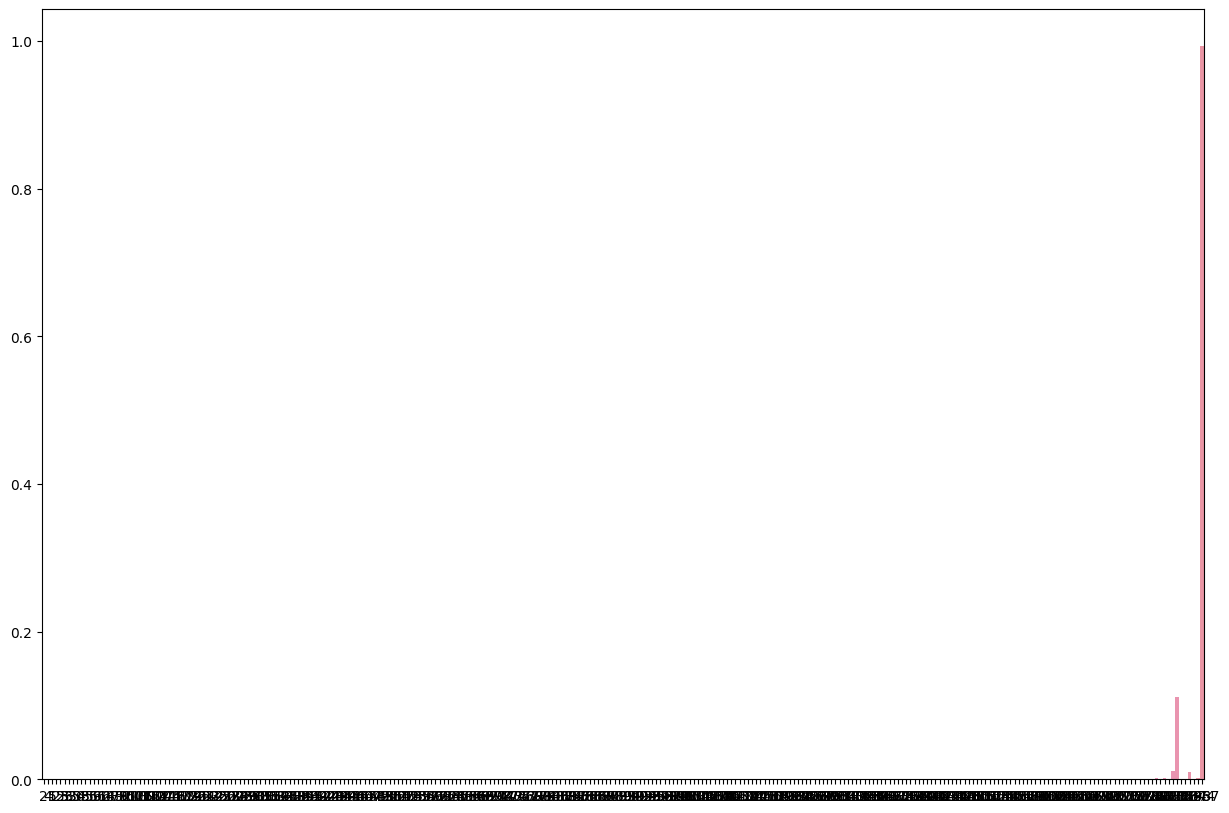

In [108]:
eigv = nx.eigenvector_centrality(graph,max_iter=800)
plt.figure(figsize=(15,10))
print(max(list(eigv.values())))
sns.barplot(x=list(eigv.keys()),y=list(eigv.values()))

C:\Users\sam\AppData\Local\Temp\ipykernel_13684\2870670537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()),kde=False)


<AxesSubplot: >

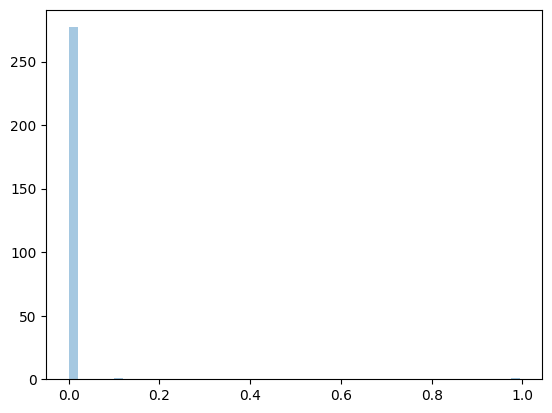

In [128]:
sns.distplot(list(eigv.values()),kde=False)

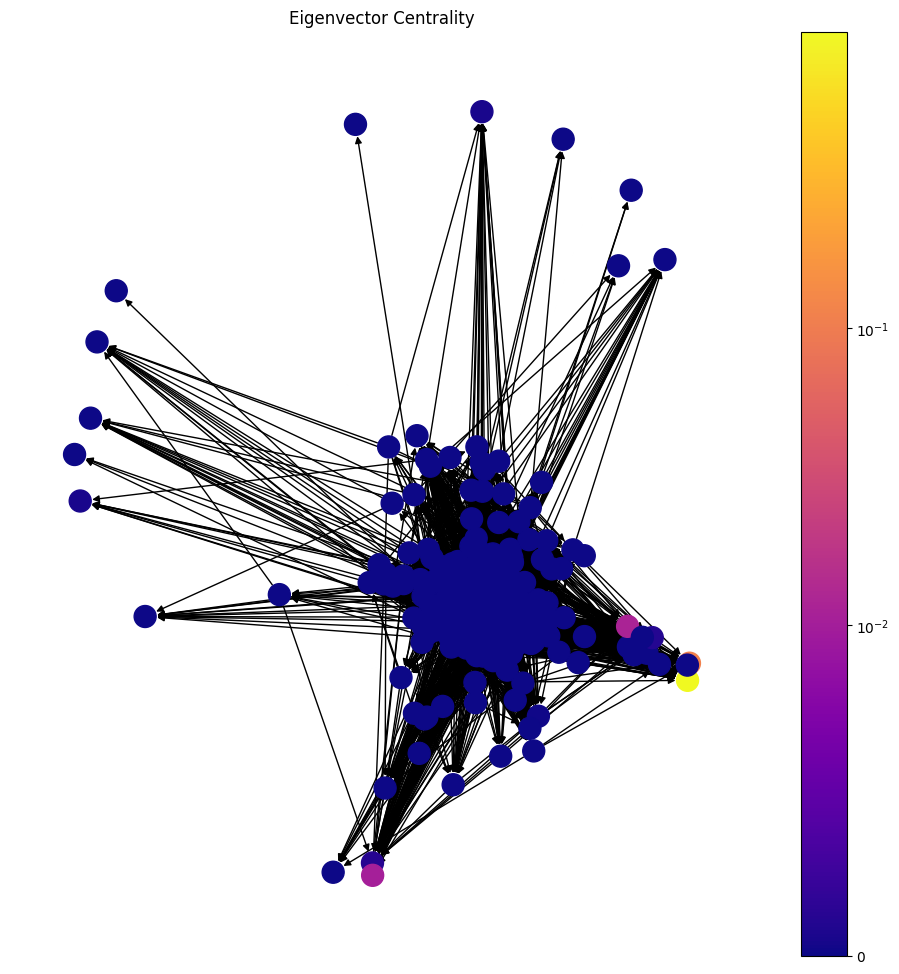

In [95]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

{1867: Text(0.6704715564585814, -0.08918066435214572, '1867')}

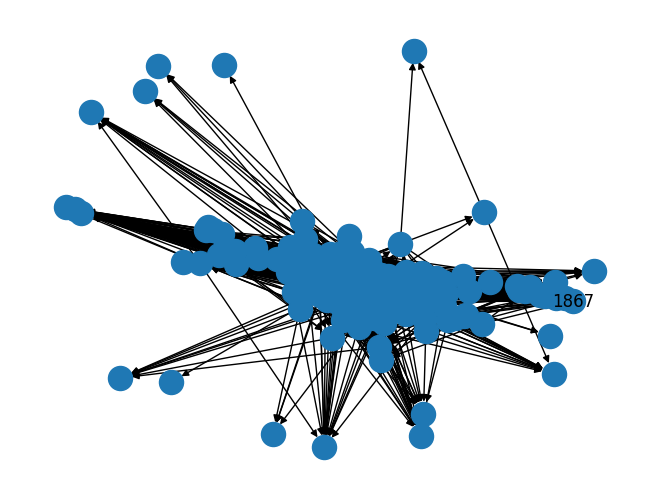

In [96]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

PageRank

<AxesSubplot: >

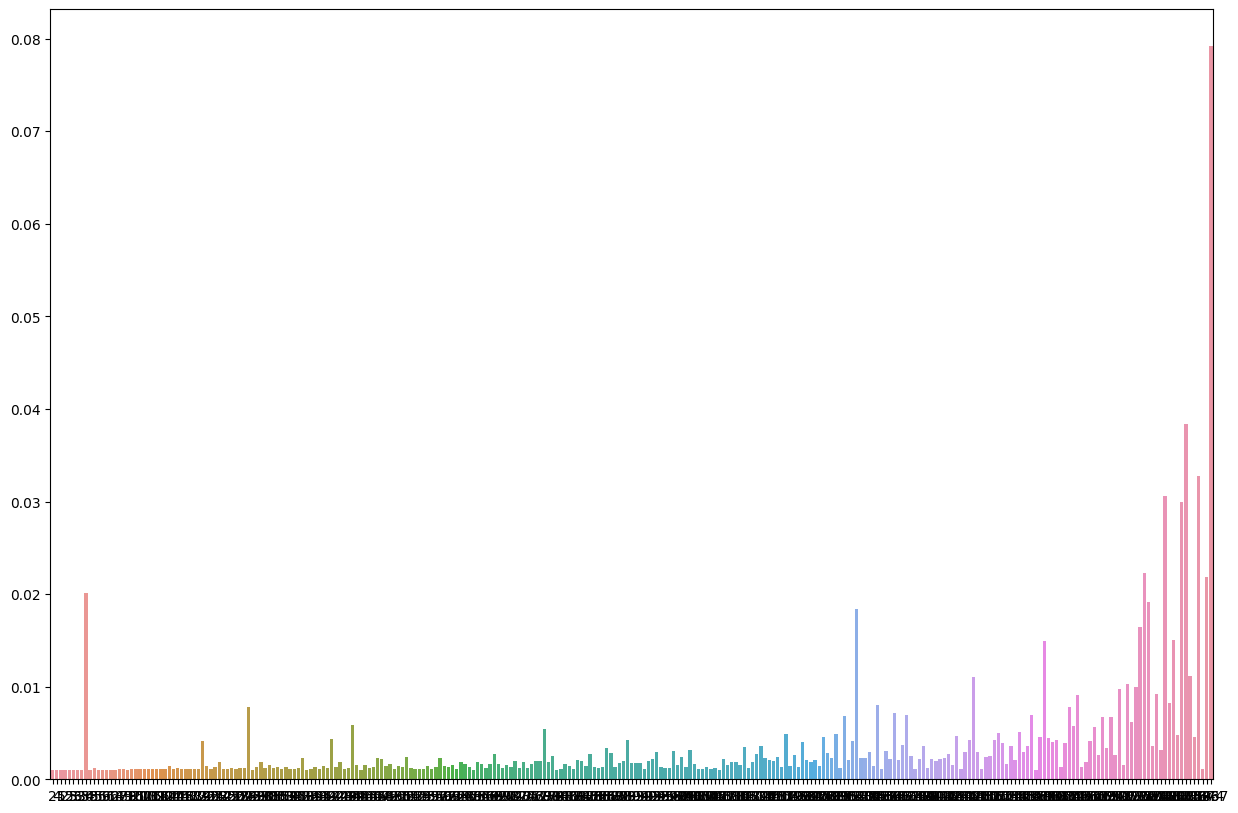

In [98]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.barplot(x = list(pager.keys()), y = list(pager.values()))

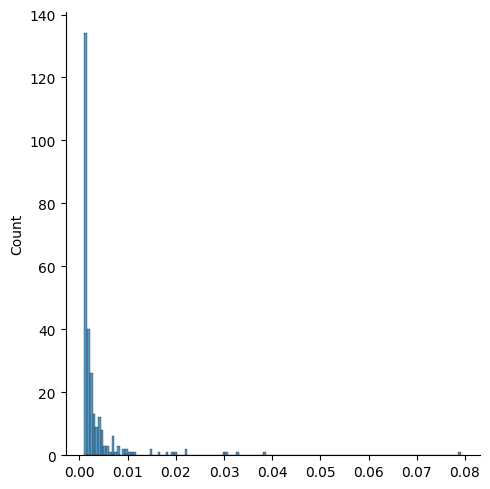

In [100]:
sns.displot(list(pager.values()))

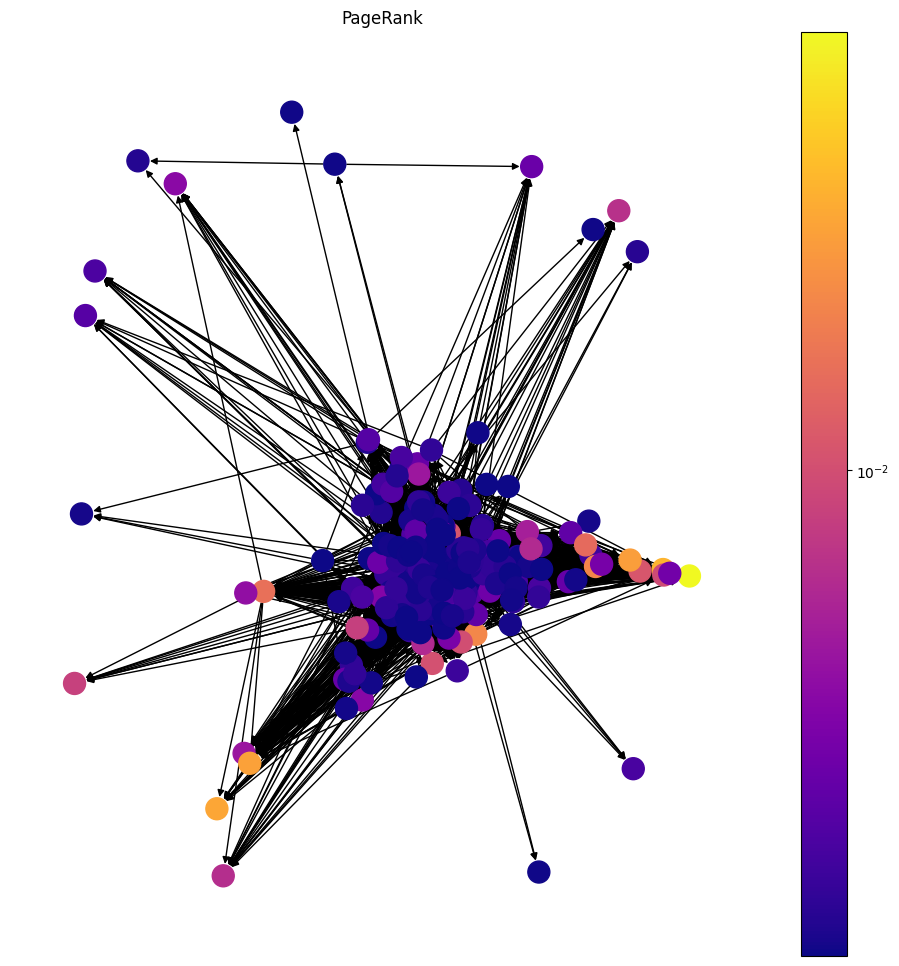

In [101]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

{1867: Text(0.32665746844063354, 0.48545512244326355, '1867')}

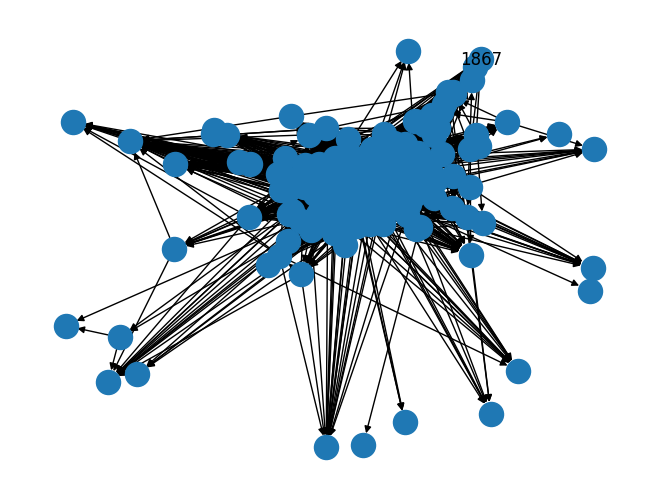

In [104]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.05: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

### Analisi delle strutture

Communites

In [110]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({5,
            15,
            25,
            36,
            38,
            45,
            62,
            85,
            103,
            141,
            144,
            163,
            173,
            174,
            207,
            235,
            241,
            274,
            275,
            290,
            305,
            306,
            342,
            428,
            441,
            467,
            471,
            492,
            504,
            507,
            514,
            577,
            599,
            689,
            698,
            704,
            720,
            731,
            743,
            807,
            827,
            828,
            870,
            878,
            894,
            902,
            905,
            973,
            982,
            988,
            996,
            1012,
            1043,
            1057,
            1068,
            1131,
            1137,
            1142,
            1164

In [113]:
print(len(communities[0]))
print(len(communities[1]))
print(len(communities[2]))
print(len(communities[3]))

112
110
55
2
